In [1]:
import pandas as pd
import numpy as np

In [2]:
df_path = r'C:\Users\livia\Desktop\UFG\Estudos\data_mining\UCMF_raw.csv'
df = pd.read_csv(df_path)

print(df.head())

   ID  Peso  Altura   IMC Atendimento        DN  IDADE Convenio   PULSOS  \
0   1   5.0      51  19.0    11/05/06  30/03/06   0.12       GS  Normais   
1   2   3.5      50  14.0    25/05/05  19/05/05   0.02       GS  Normais   
2   3   0.0       0   NaN    12/06/01  08/05/05  -4.05     SULA  Normais   
3   4   8.1      65  19.0    15/10/09  21/04/09   0.50      NaN  Normais   
4   7  40.0     151  18.0    14/01/08  14/08/95  12.89     SAME  Normais   

   PA SISTOLICA  ...            PPA NORMAL X ANORMAL      B2      SOPRO   FC  \
0           NaN  ...  Não Calculado          Anormal  Normal  Sistólico  112   
1           NaN  ...  Não Calculado          Anormal  Normal    ausente  128   
2           NaN  ...  Não Calculado          Anormal  Normal  Sistólico   88   
3           NaN  ...  Não Calculado          Anormal  Normal    ausente   92   
4           NaN  ...  Não Calculado          Anormal  Normal    ausente   96   

            HDA 1 HDA2 SEXO                      MOTIVO1  \
0 

1 Quantidade de objetos e atributos

In [3]:
objetos = len(df)
atributos = len(df.columns)

print("Objetos", objetos)
print("Atributos", atributos)

Objetos 12873
Atributos 21


Análise Univariada

In [4]:
print(df.describe(include = 'all'))

                  ID          Peso        Altura          IMC Atendimento  \
count   12873.000000  12555.000000  12873.000000  8146.000000       11890   
unique           NaN           NaN           NaN          NaN        2027   
top              NaN           NaN           NaN          NaN    12/04/10   
freq             NaN           NaN           NaN          NaN          24   
mean     9196.412103     16.614417     66.111474    17.455315         NaN   
std      5230.972692     16.979814     56.027934    15.008016         NaN   
min         1.000000    -40.000000      0.000000     0.000000         NaN   
25%      4694.000000      3.400000      0.000000    15.000000         NaN   
50%      9222.000000     12.800000     69.000000    17.000000         NaN   
75%     13768.000000     24.000000    112.000000    19.000000         NaN   
max     17873.000000    157.000000    198.000000   848.000000         NaN   

              DN         IDADE Convenio   PULSOS  PA SISTOLICA  ...  \
coun

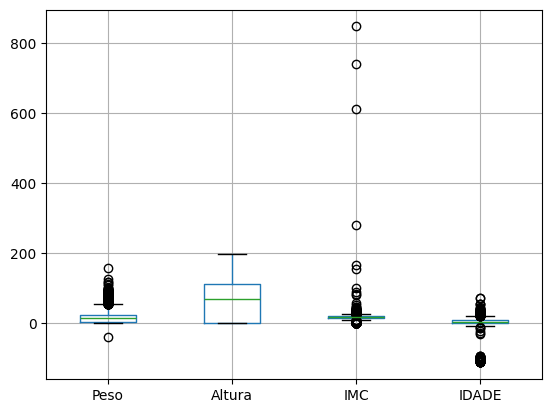

In [8]:
import matplotlib.pyplot as plt

colunas = ['Peso', 'Altura', 'IMC', 'IDADE']

df[colunas].boxplot()

plt.show()


Correção dos problemas anteriores

Idade

In [21]:
dez_maiores_idades = df.nlargest(10, 'IDADE')

print(dez_maiores_idades)

          ID  Peso  Altura   IMC Atendimento        DN   IDADE Convenio  \
11782  16731   0.0       0   NaN         NaN  26/01/09  113.18      NaN   
8490   12116   0.0       0   NaN         NaN  01/01/09  113.11     CASS   
9405   13428   0.0       0   NaN         NaN  19/11/08  112.99      NaN   
5103    7405   3.3       0   NaN         NaN  09/06/08  112.52      NaN   
1905    2790   0.0       0   NaN         NaN  19/05/08  112.46      NaN   
10583  15097   0.0       0   NaN         NaN  19/05/08  112.46      NaN   
5999    8641   2.9       0   NaN         NaN  23/01/08  112.13    GRUPO   
823     1214   5.5       0   NaN         NaN  07/01/08  112.09      NaN   
11078  15709  13.9      95  15.0         NaN  21/07/07  111.60      NaN   
11729  16652  12.5      75  22.0         NaN  04/06/07  111.47       UR   

        PULSOS  PA SISTOLICA  ...            PPA NORMAL X ANORMAL  \
11782  Normais         110.0  ...  Não Calculado           Normal   
8490   Normais           NaN  ...  N

Peso

In [9]:
dados_invalidos = df[df['Peso'] < 0]

# Mostra as primeiras linhas com erro para você analisar
print("Linhas com peso negativo:")
print(dados_invalidos)

Linhas com peso negativo:
         ID  Peso  Altura  IMC Atendimento        DN  IDADE Convenio   PULSOS  \
9555  13629 -40.0       0  NaN    27/02/04  24/12/92   11.6     SULA  Normais   

      PA SISTOLICA  ...            PPA NORMAL X ANORMAL      B2    SOPRO  FC  \
9555           NaN  ...  Não Calculado           Normal  Normal  ausente  72   

              HDA 1 HDA2 SEXO                   MOTIVO1               MOTIVO2  
9555  Assintomático  NaN    F  5 - Parecer cardiológico  5 - Atividade física  

[1 rows x 21 columns]


In [10]:
df['Peso'] = df['Peso'].abs() #para transformar em valor absoluto

# Para verificar, você pode ver se ainda existe alguma idade negativa
print("Menor peso após a correção:", df['Peso'].min())

Menor peso após a correção: 0.0


In [11]:
dados_invalidos = df[df['Peso'] == 0]

# Mostra as primeiras linhas com erro para você analisar
print("Linhas com peso negativo:")
print(dados_invalidos)

Linhas com peso negativo:
          ID  Peso  Altura  IMC Atendimento        DN  IDADE     Convenio  \
2          3   0.0       0  NaN    12/06/01  08/05/05  -4.05         SULA   
13        16   0.0       0  NaN    29/03/05  31/07/00   4.84           GS   
21        26   0.0       0  NaN    21/02/05  20/01/98   7.36           GS   
36        49   0.0       0  NaN    05/03/09  28/11/07   1.32          NaN   
46        65   0.0       0  NaN         NaN       NaN    NaN          NaN   
...      ...   ...     ...  ...         ...       ...    ...          ...   
12837  17838   0.0       0  NaN         NaN       NaN    NaN          NaN   
12839  17840   0.0       0  NaN         NaN       NaN    NaN          NaN   
12843  17844   0.0       0  NaN    19/11/07  15/10/02   5.29  Norclínicas   
12848  17849   0.0       0  NaN    05/03/09       NaN    NaN        GRUPO   
12855  17856   0.0       0  NaN         NaN       NaN    NaN          NaN   

        PULSOS  PA SISTOLICA  ...            PPA 

In [12]:
contagem_zeros = (df['Peso'] == 0).sum()

print(f"O número de pesos iguais a zero é: {contagem_zeros}")

O número de pesos iguais a zero é: 2609
